# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Generate random data
np.random.seed(0)
X = 2.5*np.random.randn(100) + 1.5
y_pred = 2 + 0.3*X
res =0.5* np.random.randn(100)
y_act = 2 + 0.3*X + res

In [3]:
# Store X, y_pred and y_act in data frame
df = pd.DataFrame({'X':X,  'y_act':y_act, 'y_pred': y_pred})
df.head()

,X,y_act,y_pred
0,5.910131,4.714615,3.773039
1,2.500393,2.076238,2.750118
2,3.946845,2.548811,3.184053
3,7.102233,4.615368,4.130670
4,6.168895,3.264107,3.850668


<function matplotlib.pyplot.show(*args, **kw)>

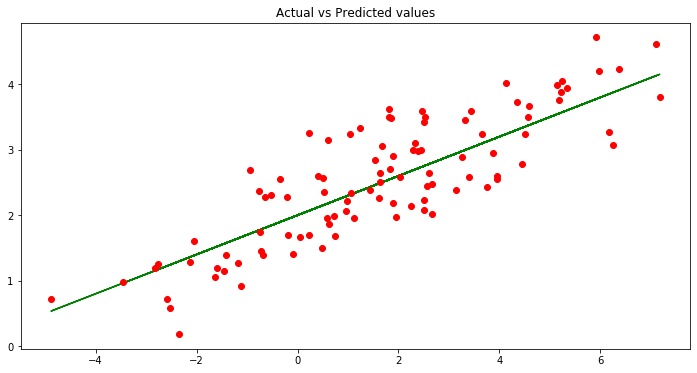

In [4]:
# Plot predicted and actual values againts input variables
plt.figure(figsize = (12,6))
plt.plot(X, y_pred, 'g')
plt.plot(X, y_act, 'ro')
plt.title('Actual vs Predicted values')
plt.show

# Model efficacy

There are two main methods used to evaluate quantitative response values:

**Total variability** can be explained with the Total Sum of Squares (SST), which is composed of two terms: the Regression Sum of Squares (SSR) and the Difference Sum of Squares (SSD).  In other words, *the total variability of the data is equal to the variability explained by the regression line plus the unexplained variability, known as error.* So:
                              SST = SSR + SSD
                              
*SSR* (also known as explained sum of squares) is simply the sum of squared differences between the predicted value or regression line (y_pred) and the mean of the dependent variable (y_act). Think of it as a measure that describes how well a regression line fits the data or as the difference of the regression line versus the baseline (mean) model.
*SSD* (also known as residual sum of squares, sum of squares error or unexplained sun of squares) is the sum of the squared differences differences between the observed values (y_act) and the predicted values (y_pred).

**R-squared** or coefficient of determination is given by the ratio of the regression sum of squares to total sum of squares:
                           *R<sup>2</sup>* = SSR/SST = 1 - SSD/SST
                           
*SST* is obtained as the sum of squared differences between the observed values for the dependant variable (y_act) and its mean response value. Think of this as a measure of total variability or as the dispersion of the observed values around the mean – much like the variance in descriptive statistics. Values closer to 1 represent a better model. Also, bear in mind that *R<sup>2</sup>* will always favor the most complex model since its value always increases as parameters are added to the model. 

**Visual explanation** ![](https://vitalflux.com/wp-content/uploads/2017/11/linear-regression.png)

In [6]:
# Calculate the mean of Y
y_mean = np.mean(y_act)
print(f'Mean of Y = {y_mean}')

Mean of Y = 2.5358624970247825


In [7]:
# Calculate SSR and SST
df['SSR'] = (df['y_pred'] - y_mean)**2
df['SSD'] = (df['y_pred'] - df['y_act'])**2
df['SST'] = (df['y_act'] - y_mean)**2
SSR = df['SSR'].sum()
SSD = df['SSD'].sum()
SST = df['SST'].sum()

# Obtain R-squared
R2 = SSR/SST

print(f'R-sq = {R2}')

R-sq = 0.6185994959777246


Here R-square can be interpreted as follows: *"about 62% of variation in the response variable is explained by the model".* In this case the model includes a single feature or variable (X).

In [8]:
# Obtain total variability
SST = SSR  +  SSD
print(f'SST = {SST}')

SST = 84.23994858909019


In [9]:
SST

84.23994858909019

## Assumptions of linear regression models

About errors:
   - Normality - Error values follow a normal distribution with mean 0 and standard deviation of 1.
   - Independence - Error values are statistically independent.
   - Homescedasticity - The probability distribution of the errors follow a constant variance
    

# Least squares
Here are the formulas for ɑ and β again:

![](https://latex.codecogs.com/gif.latex?%5Cbegin%7Balign*%7D%20%26%20%5Cbeta%20%3D%20%5Cfrac%7B%5Csum%5Climits_%7Bi%3D1%7D%5E%7Bn%7D%28X_i%20-%20%5Cbar%20X%29%28Y_i%20-%20%5Cbar%20Y%29%7D%7B%5Csum%5Climits_%7Bi%3D1%7D%5E%7Bn%7D%28X_i%20-%20%5Cbar%20X%29%5E2%7D%20%5C%5C%20%26%20%5Calpha%20%3D%20%5Cbar%20Y%20-%20%5Cbeta*%20%5Cbar%20X%20%5Cend%7Balign*%7D)

In statistical terms, the numerator in β corresponds to the covariance of X and y, while the denominator corresponds to the variance of X.

In [10]:
#Calculate the mean of X and Y
x_mean = np.mean(X)
y_mean = np.mean(y_act)

# Calculate covariance of X and y, and variance of X
df['xy_cov'] = (df['X'] - x_mean) * (df['y_act'] - y_mean)
df['x_var'] = (df['X'] - x_mean)**2

#Estimate beta and alpha
beta = df['xy_cov'].sum()/df['x_var'].sum()
alpha = y_mean - (beta*x_mean)

print(f'alpha = {alpha}\nbeta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [11]:
# Obtain predicted values using LS
df['y_pred_ls'] = alpha + beta*df['X']

In [12]:
# Obtain R
df['SSR'] = (df['y_pred_ls'] - y_mean)**2
df['SST'] = (df['y_act'] - y_mean)**2
SSR = df['SSR'].sum()
SST = df['SST'].sum()
R2 = SSR/SST
print(f'R2 = {R2}')

R2 = 0.7147163547202341


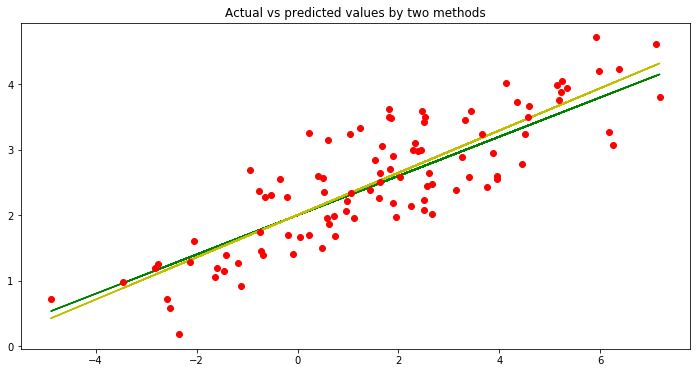

In [13]:
# Plot predicted LS values vs actual response values
plt.figure(figsize = (12, 6))
plt.plot(X, y_pred, 'g')
plt.plot(X, df['y_pred_ls'], 'y')
plt.plot(X, y_act, 'ro')

plt.title("Actual vs predicted values by two methods")
plt.show()

As we can see, the y_pred_ls and y_pred are more or less overlapping since the respective values of ɑ and β are not very different.

# Model Efficacy 2

**RSE (Residual Standard Errors):** Estimate of the standard deviation of the error term. So,

![](https://latex.codecogs.com/gif.latex?RSE%20%3D%20%5Csqrt%7B%5Cfrac%7B1%7D%7Bn-2%7D*%5Ctext%7BSSD%7D%7D)

where *n* is the number of records in the dataset.

In general,

![](https://latex.codecogs.com/gif.latex?RSE%20%3D%20%5Csqrt%7B%5Cfrac%7B1%7D%7Bn-p-1%7D*%5Ctext%7BSSD%7D%7D)

where p is the number of predictor variables in the model.
In multiple regression, the value of RSE generally decreases as we add variables that are more significant predictors of the output variable.

In [14]:
df['SSD'] = (df['y_pred_ls'] - df['y_act'])**2
SSD = df['SSD'].sum()
RSE = np.sqrt(SSD/98)  #n=100
print(f'RSE = {RSE}')

RSE = 0.5193136792898965


In [15]:
SSD

26.42929635476573

By comparing the standard deviation of the error term to the mean of the actual values, we obtain the percentage difference of the ls model versus the baseline model:

In [16]:
error = RSE/y_mean
error

0.20478779109639608

The benchmark to compare this to is the mean of the actual values, yact. As shown previously, this value is ymean = 2.54. In plain English, this means we observe an error of 0.46 over 2.54 – approximately 20.48%.

**p-values**
p-values are used along hypothesis tests as a mean to determine if the coefficient values are significant. The null hypothesis assumes no significance, or a β value of zero. If a p-value is less than a chosen significance level (e.g. 0.05) then the null hypothesis that β = 0 is rejected and β is taken to be significant and non-zero (the alternative hypothesis is accepted).

The p-value represents a probability compared against a significance level associated with a critical value, or a cut-off value represented by the number of standard deviations beyond of which the null hypothesis can be rejected as there is a high chance that non-zero β values occur. 

**F-statistics**

In a multiple regression model, apart from testing the significance of individual variables by checking the p-values, it is also necessary to check whether, as a group all the predictors are significant. This can be done using the following hypothesis:

![](https://latex.codecogs.com/gif.latex?%5Cbegin%7Balign*%7D%20%26%5Ctext%7BNull%20hypothesis%20%7D%20H_0%3A%20%5Cbeta_1%20%3D%20%5Cbeta_2%20%3D%20%5Cdots%20%3D%20%5Cbeta_p%20%3D%200%20%5C%5C%20%26%5Ctext%7BAlternative%20hypothesis%20%7DH_1%3A%20%5Ctext%7B%20Any%20%7D%20%5Cbeta_i%20%3C%3E%200%20%5Cend%7Balign*%7D)

The statistic that is used to test this hypothesis is called the **F-statistic** and is defined as follows:

![](https://latex.codecogs.com/gif.latex?%5Ctext%7BF-statistic%7D%3D%20%5Cfrac%7B%28%5Ctext%7BSST%7D%20-%20%5Ctext%7BSSD%7D%29/p%7D%7B%5Ctext%7BSSD%7D/%28n-p-1%29%7D)

where n = number of rows in the dataset and p = number of predictor variables in the model.

There is a p-value that is associated with this F-statistic. If the p-value is smaller than the chosen significance level, the null hypothesis can be rejected.

It is important to look at the F-statistic because:

- p-values are about individual relationships between predictors and the outcome variable. However, one predictor's relationship with the output might be impacted by the presence of other variables.
- When the number of predictors in the model is very large and all the $\beta_i$ are very close to zero, the individual p-values associated with the predictors might give very small values so we might incorrectly conclude that there is a relationship between the predictors and the outcome.